In [2]:
%load_ext autoreload
%autoreload 2
from wd_setup import WhiteDwarf
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

<Axes: title={'center': 'Total Mass: 1.376$M_{\\odot}$'}, xlabel='Radius (km)', ylabel='Mass ($M_\\odot$)'>

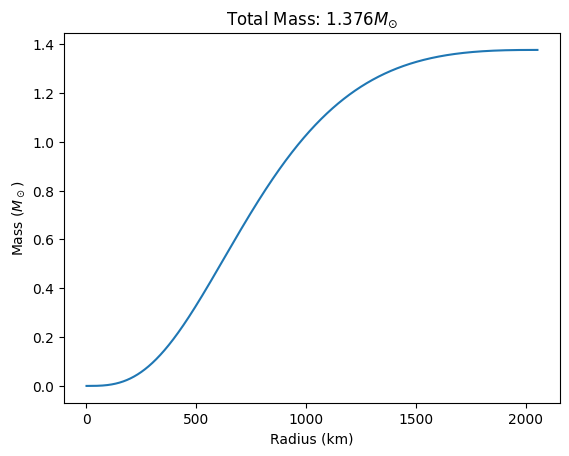

In [4]:
wd_k0 = WhiteDwarf(Ye=0.5, rhoc_scaled=1e3, Z=6, k=0, T0=0)
wd_k0.integrate()
wd_k0.plot_profile("M")

dr (km): 3.860e-01 | Radius (km) 3.860e-01 | Density (g/cc): 1.958e+09 | Mass (☉): 1.909e-09 | TOV: -1.193e+04 | Proton Pressure: -7.563e-10 | drhodr: -3.597e+03 |  l (cm): 2.982e+06 | dTdr: -8.493e+00
dr (km): 3.860e-01 | Radius (km) 7.720e-01 | Density (g/cc): 1.958e+09 | Mass (☉): 6.442e-09 | TOV: -2.982e+03 | Proton Pressure: -9.455e-11 | drhodr: -8.991e+02 |  l (cm): 2.982e+06 | dTdr: -8.494e+00
dr (km): 3.860e-01 | Radius (km) 1.158e+00 | Density (g/cc): 1.957e+09 | Mass (☉): 1.527e-08 | TOV: -1.325e+03 | Proton Pressure: -2.802e-11 | drhodr: -3.996e+02 |  l (cm): 2.982e+06 | dTdr: -8.495e+00
dr (km): 3.860e-01 | Radius (km) 1.544e+00 | Density (g/cc): 1.957e+09 | Mass (☉): 2.982e-08 | TOV: -7.456e+02 | Proton Pressure: -1.182e-11 | drhodr: -2.248e+02 |  l (cm): 2.982e+06 | dTdr: -8.495e+00
dr (km): 3.860e-01 | Radius (km) 1.930e+00 | Density (g/cc): 1.957e+09 | Mass (☉): 5.153e-08 | TOV: -4.774e+02 | Proton Pressure: -6.052e-12 | drhodr: -1.439e+02 |  l (cm): 2.982e+06 | dTdr: -

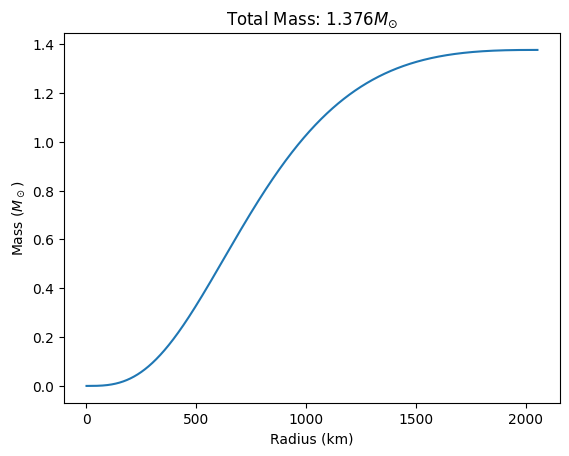

In [ ]:
from constants import proton_energy
wd = WhiteDwarf(Ye=0.5, rhoc_scaled=1e3, Z=6, k=5e-30, T0=1e8)
wd.integrate(DEBUG=True)
wd.plot_profile('M')
print(f"{wd.p_decay.luminosity(E_gamma=proton_energy, m=wd.mass*wd.M0):.3e}")

<Axes: xlabel='Radius (km)', ylabel='Temperature (K)'>

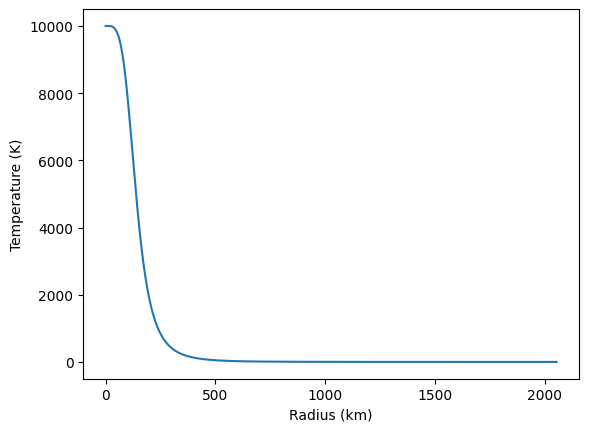

In [41]:
wd.plot_profile("T")

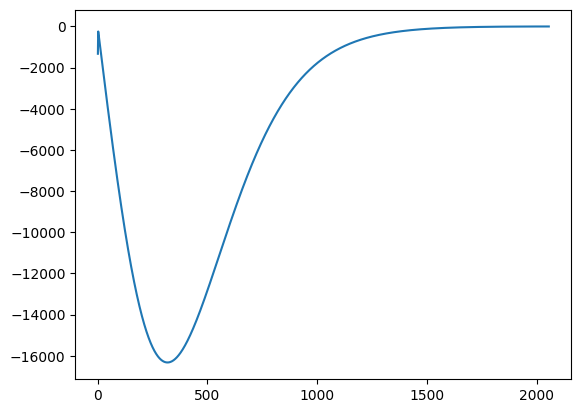

In [18]:
from constants import *
plt.plot(wd.rbar2r(wd.R_profile)[2:], (wd.debug_history[:, 0])[2:])

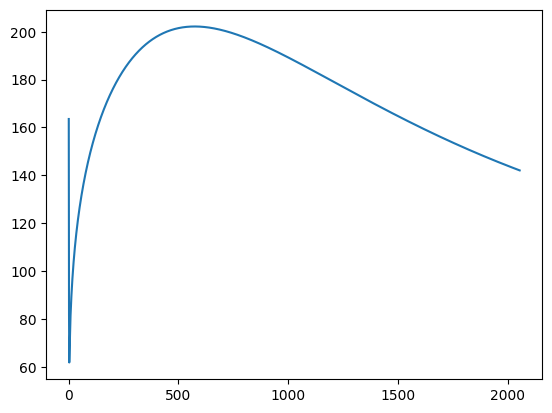

In [20]:
from constants import *
P = wd.debug_history[:, -2] * c / (48 * np.pi * (wd.R0 * wd.R_profile) ** 2)
T = (wd.debug_history[:, -2] / (4 * np.pi * (wd.R0 * wd.R_profile) ** 2 * sigma)) ** 0.25
plt.plot(wd.rbar2r(wd.R_profile), T)

In [ ]:
N = len(wd.rho_profile)
plt.plot(wd.rbar2r(wd.R_profile)[:N], np.abs(wd.debug_history[:, 0])[:N])
plt.plot(wd.rbar2r(wd.R_profile)[:N], np.abs(wd.debug_history[:, 1])[:N])
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r"|$\frac{dP}{dr}$|")

NameError: name 'wd' is not defined

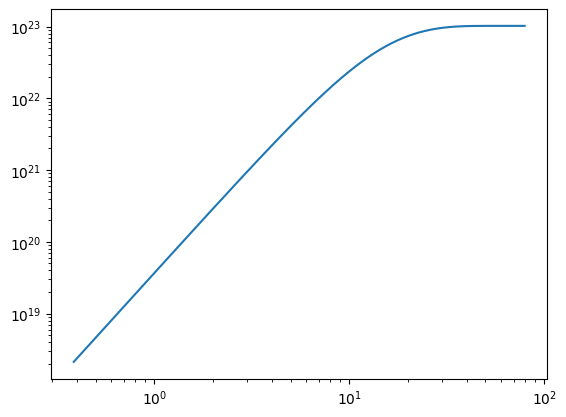

In [ ]:
plt.loglog(wd.rbar2r(wd.R_profile), wd.p_decay.luminosity(proton_energy, (wd.M_profile * wd.M0)))

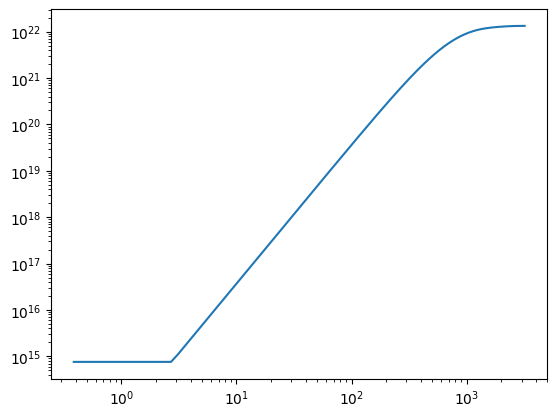

In [ ]:
plt.loglog(wd.rbar2r(wd.R_profile), np.abs(wd.debug_history[:, -2]))

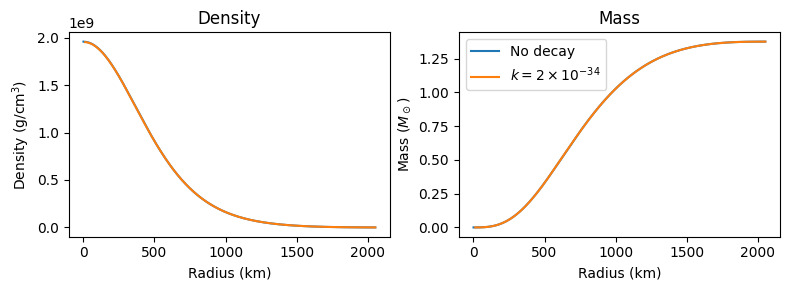

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
wd_k0.plot_profile('rho', ax=ax[0], label='No decay')
wd.plot_profile('rho', ax=ax[0], label=r'$k=2\times10^{-34}$', title='Density')
wd_k0.plot_profile('M', ax=ax[1], label='No decay')
wd.plot_profile('M', ax=ax[1], label=r'$k=2\times10^{-34}$', title='Mass')
plt.legend()
plt.tight_layout()

In [ ]:
def get_MR(k):
    R = []
    M = []
    L = []
    rho_range = np.logspace(-1, 6, 10)
    for rho in tqdm(rho_range):
        wd = WhiteDwarf(Ye=0.5, rhoc_scaled=rho, Z=6, k=k, T0=1e9)
        wd.integrate()
        R.append(wd.rbar2r(wd.radius))
        M.append(wd.mbar2m(wd.mass))
        L.append(wd.p_decay.luminosity(E_gamma=proton_energy, m=wd.mass*wd.M0))

    return np.array(R), np.array(M), np.array(L)

In [ ]:
MR_r, MR_m, MR_L = [] , [], []
k_list = np.linspace(1e-34, 7e-33, 10)
for k in k_list:
    r, m, L = get_MR(k)
    MR_r.append(r)
    MR_m.append(m)
    MR_L.append(L)

 40%|████      | 4/10 [00:09<00:13,  2.27s/it]


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("/Users/caritsang/Library/CloudStorage/OneDrive-TheChineseUniversityofHongKong/01 Project/FYP_Sem1/data/MWDD-export.csv")
df = df.dropna(subset=df.columns)
df.head
M_SOLAR = 1.989e+30
G = 6.674e-11

def g2r(surface_g, mass):
    g = 10 ** surface_g / 100
    mass_kg = mass * M_SOLAR

    radius = np.sqrt(G * mass_kg / g)

    return radius / 1000 # m to km
radius = g2r(df['logg'], df['mass'])
df['radius'] = radius

/Users/caritsang/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


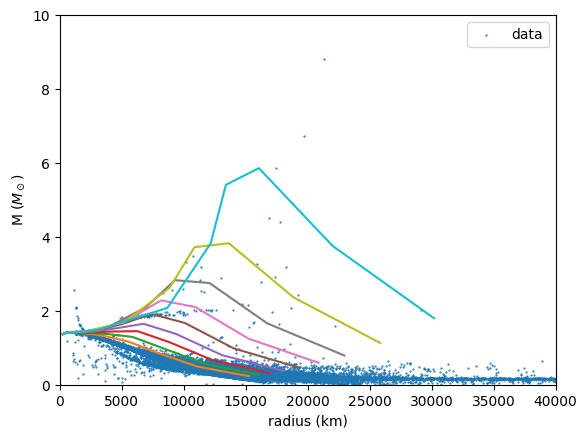

In [ ]:
plt.scatter(df['radius'], df['mass'], label='data', s=0.3)
plt.ylim(0, 10)
plt.xlim(0, 40000)
plt.xlabel("radius (km)")
plt.ylabel(r"M ($M_\odot$)")
for i in range(len(k_list)):
    plt.plot(MR_r[i], MR_m[i])
plt.legend()

In [ ]:
e = 1.6e-19
c = 3e8
R = 1 / 6.02e23
a = 5.67e-8
Z = 6

2.8294015723415e+20

In [ ]:
wd.rho_profile[0] * wd.rho0 *100 ** 3 / 100 * (6.626e-34 / np.sqrt(2 * np.pi * 12 * mp / 1000 * (1/6.02e23) * 100)) ** 3

5.940505077191419e-21

In [ ]:
def get_Teff(L, R):
    #L: erg/s
    #R: km
    return (L / (4 * np.pi * (R * 1000 * 100) ** 2 * 5.67e-5)) ** 0.25

from temperature import temperature
T = temperature(wd=wd)
T_eff = get_Teff(MR_L[0][-1], MR_r[0][-1])
print(T_eff)                 
T_profile = T.get_Tc(T_eff=T_eff, T_l=1, T_r=1000, epsilon=100)
plt.plot(T_profile)

151.26889483696715


TypeError: dTdr() got an unexpected keyword argument 'E_gamma'

In [ ]:
(wd.rho_profile * wd.rho0)

array([1.95800000e+05, 1.95800001e+05, 1.95800002e+05, ...,
       1.53883286e+01, 6.07399611e+00, 3.58321737e-01])

(0.0, 40000.0)

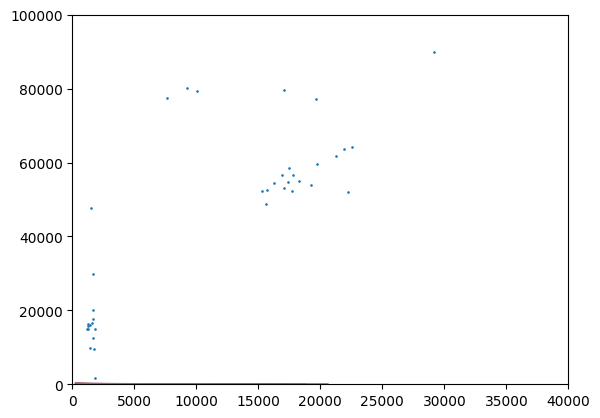

In [ ]:
test = df[df['mass'] > 1.5]
plt.scatter(test['radius'], test['teff'], s=0.8)
#plt.scatter(df['radius'], df['teff'], s=0.8)
for i in range(len(k_list[:-5])):
    plt.plot(MR_r[i], get_Teff(MR_L[i], MR_r[i]))
plt.ylim(0, 1e5)   
plt.xlim(0, 40000)